In [1]:
pip install numpy pandas scikit-learn tensorflow keras matplotlib seaborn yfinance alpha_vantage vaderSentiment transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.6 MB/s eta 0:00:00


In [2]:
import yfinance as yf
import pandas as pd

# Define stock ticker and date range
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2024-01-01"

# Fetch historical stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Save raw data
stock_data.to_csv("stock_data.csv")

# Display sample
print(stock_data.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716080  72.776606  71.466820  71.721026  135480400
2020-01-03  72.009132  72.771760  71.783977  71.941343  146322800
2020-01-06  72.582901  72.621639  70.876068  71.127858  118387200
2020-01-07  72.241554  72.849231  72.021238  72.592601  108872000
2020-01-08  73.403641  73.706271  71.943751  71.943751  132079200


In [3]:
# Extract relevant trading volume trends
stock_data['Daily_Change'] = stock_data['Close'].pct_change()
stock_data['Volume_Change'] = stock_data['Volume'].pct_change()

# Save processed trading volume data
stock_data.dropna().to_csv("processed_stock_data.csv")


In [5]:
import yfinance as yf
import pandas as pd

# Define stock ticker and date range
ticker = "AAPL"  # Change to your preferred stock
start_date = "2020-01-01"
end_date = "2024-01-01"

# Fetch stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Add daily percentage changes
stock_data["Daily_Change"] = stock_data["Close"].pct_change()
stock_data["Volume_Change"] = stock_data["Volume"].pct_change()

# Drop NA values
stock_data.dropna(inplace=True)

# Save to CSV for later use
stock_data.to_csv("stock_data.csv")

# Display first few rows
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume  \
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL   
Date                                                                
2020-01-03  72.009132  72.771760  71.783977  71.941343  146322800   
2020-01-06  72.582901  72.621639  70.876068  71.127858  118387200   
2020-01-07  72.241554  72.849231  72.021238  72.592601  108872000   
2020-01-08  73.403641  73.706271  71.943751  71.943751  132079200   
2020-01-09  74.962799  75.156480  74.132383  74.384166  170108400   

Price      Daily_Change Volume_Change  
Ticker                                 
Date                                   
2020-01-03    -0.009722      0.080029  
2020-01-06     0.007968     -0.190918  
2020-01-07    -0.004703     -0.080374  
2020-01-08     0.016086      0.213160  
2020-01-09     0.021241      0.287927  


In [9]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Sample financial headlines (Manually add or scrape using BeautifulSoup)
news_headlines = [
    "Apple's stock surges after strong earnings report",
    "Tech stocks face volatility amid global economic slowdown",
    "iPhone sales decline raises concerns for Apple investors",
    "Apple announces innovative AI-powered features",
    "US stock market closes higher despite recession fears"
]

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Compute sentiment scores
sentiment_scores = [analyzer.polarity_scores(text)["compound"] for text in news_headlines]

# Create DataFrame
news_df = pd.DataFrame({
    "Date": pd.date_range(start="2020-01-03", periods=len(news_headlines), freq="D"),
    "Headline": news_headlines,
    "Sentiment_Score": sentiment_scores
})

# Save news data
news_df.to_csv("sentiment_data.csv", index=False)

# Display processed news data
print(news_df.head())


        Date                                           Headline  \
0 2020-01-03  Apple's stock surges after strong earnings report   
1 2020-01-04  Tech stocks face volatility amid global econom...   
2 2020-01-05  iPhone sales decline raises concerns for Apple...   
3 2020-01-06     Apple announces innovative AI-powered features   
4 2020-01-07  US stock market closes higher despite recessio...   

   Sentiment_Score  
0           0.5106  
1           0.0000  
2           0.0000  
3           0.4404  
4           0.5667  


In [11]:
import yfinance as yf
import pandas as pd

# Define stock ticker and time period
ticker = "AAPL"
start_date = "2020-01-01"
end_date = "2024-01-01"

# Download stock data
stock_data = yf.download(ticker, start=start_date, end=end_date)

# Save as CSV (optional)
stock_data.to_csv("apple_stock_data.csv")

# Display first rows
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.716080  72.776606  71.466820  71.721026  135480400
2020-01-03  72.009132  72.771760  71.783977  71.941343  146322800
2020-01-06  72.582901  72.621639  70.876068  71.127858  118387200
2020-01-07  72.241554  72.849231  72.021238  72.592601  108872000
2020-01-08  73.403641  73.706271  71.943751  71.943751  132079200


In [12]:
# Calculate daily percentage change
stock_data["Daily_Change"] = stock_data["Close"].pct_change()
stock_data["Volume_Change"] = stock_data["Volume"].pct_change()

# Drop NaN values after calculation
stock_data.dropna(inplace=True)

# Display updated dataset
print(stock_data.head())


Price           Close       High        Low       Open     Volume  \
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL   
Date                                                                
2020-01-03  72.009132  72.771760  71.783977  71.941343  146322800   
2020-01-06  72.582901  72.621639  70.876068  71.127858  118387200   
2020-01-07  72.241554  72.849231  72.021238  72.592601  108872000   
2020-01-08  73.403641  73.706271  71.943751  71.943751  132079200   
2020-01-09  74.962799  75.156480  74.132383  74.384166  170108400   

Price      Daily_Change Volume_Change  
Ticker                                 
Date                                   
2020-01-03    -0.009722      0.080029  
2020-01-06     0.007968     -0.190918  
2020-01-07    -0.004703     -0.080374  
2020-01-08     0.016086      0.213160  
2020-01-09     0.021241      0.287927  


In [13]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Sample financial news headlines for sentiment analysis
news_headlines = [
    "Apple stock surges after strong earnings report",
    "Tech sector faces volatility amid global economic concerns",
    "iPhone sales decline, raising investor concerns",
    "Apple announces new AI-driven innovations",
    "Stock market closes higher despite recession fears"
]

# Initialize sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Compute sentiment scores
sentiment_scores = [analyzer.polarity_scores(text)["compound"] for text in news_headlines]

# Create sentiment DataFrame
news_df = pd.DataFrame({
    "Date": pd.date_range(start="2020-01-01", periods=len(news_headlines), freq="M"),
    "Headline": news_headlines,
    "Sentiment_Score": sentiment_scores
})

# Display sentiment scores
print(news_df)


        Date                                           Headline  \
0 2020-01-31    Apple stock surges after strong earnings report   
1 2020-02-29  Tech sector faces volatility amid global econo...   
2 2020-03-31    iPhone sales decline, raising investor concerns   
3 2020-04-30          Apple announces new AI-driven innovations   
4 2020-05-31  Stock market closes higher despite recession f...   

   Sentiment_Score  
0           0.5106  
1           0.0000  
2           0.0000  
3           0.0000  
4           0.5667  


<ipython-input-13-f3674cbab1c1>:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Date": pd.date_range(start="2020-01-01", periods=len(news_headlines), freq="M"),



📊 First Few Rows of Data:
                Close       High        Low       Open     Volume  \
Date                                                                
2020-01-03  72.009132  72.771760  71.783977  71.941343  146322800   
2020-01-06  72.582901  72.621639  70.876068  71.127858  118387200   
2020-01-07  72.241554  72.849231  72.021238  72.592601  108872000   
2020-01-08  73.403641  73.706271  71.943751  71.943751  132079200   
2020-01-09  74.962799  75.156480  74.132383  74.384166  170108400   

            Daily_Change  Volume_Change  
Date                                     
2020-01-03     -0.009722       0.080029  
2020-01-06      0.007968      -0.190918  
2020-01-07     -0.004703      -0.080374  
2020-01-08      0.016086       0.213160  
2020-01-09      0.021241       0.287927  

📈 Statistical Summary:
           Close       High        Low       Open        Volume  Daily_Change  \
count   5.000000   5.000000   5.000000   5.000000  5.000000e+00      5.000000   
mean   73

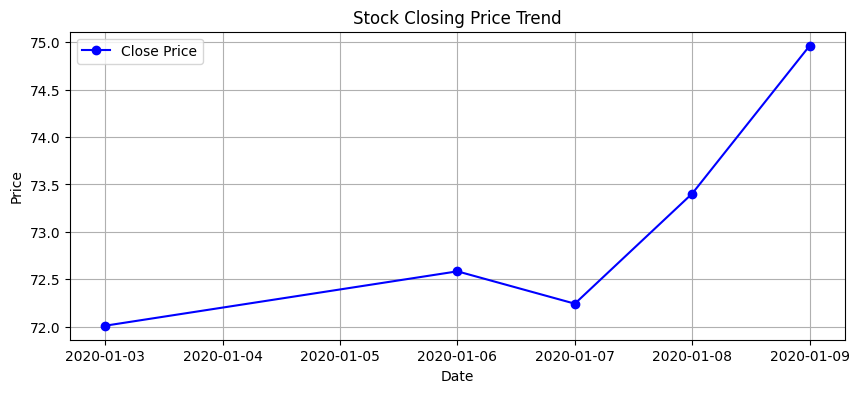

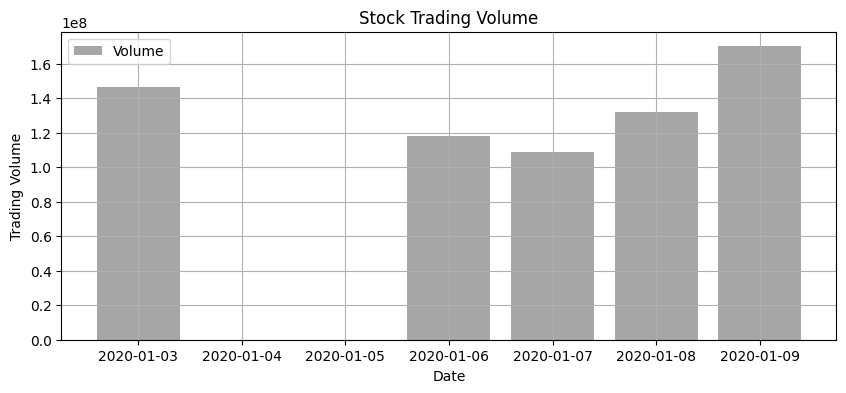

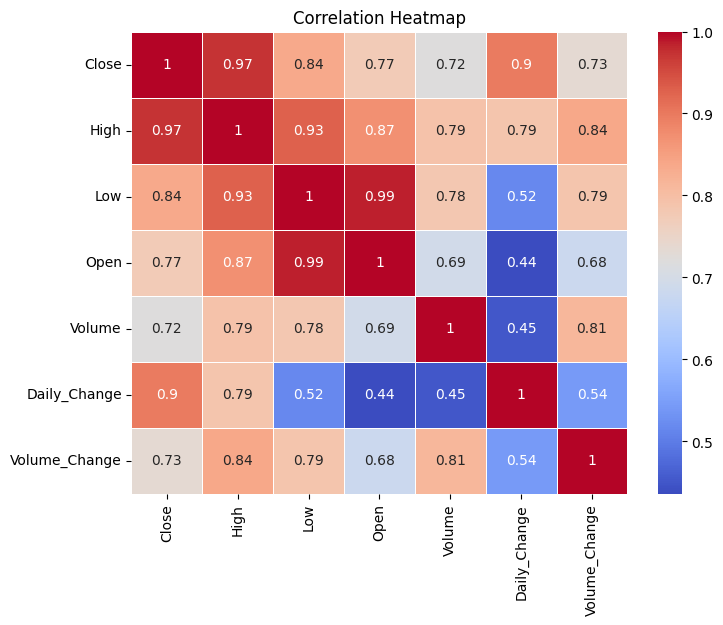

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create DataFrame manually
data = {
    "Date": ["2020-01-03", "2020-01-06", "2020-01-07", "2020-01-08", "2020-01-09"],
    "Close": [72.009132, 72.582901, 72.241554, 73.403641, 74.962799],
    "High": [72.771760, 72.621639, 72.849231, 73.706271, 75.156480],
    "Low": [71.783977, 70.876068, 72.021238, 71.943751, 74.132383],
    "Open": [71.941343, 71.127858, 72.592601, 71.943751, 74.384166],
    "Volume": [146322800, 118387200, 108872000, 132079200, 170108400],
    "Daily_Change": [-0.009722, 0.007968, -0.004703, 0.016086, 0.021241],
    "Volume_Change": [0.080029, -0.190918, -0.080374, 0.213160, 0.287927],
}

df = pd.DataFrame(data)

# Convert Date to datetime format
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Step 2: Basic Exploration
print("\n📊 First Few Rows of Data:")
print(df.head())

# Step 3: Statistical Summary
print("\n📈 Statistical Summary:")
print(df.describe())

# Step 4: Correlation Analysis
print("\n🔍 Correlation Matrix:")
print(df.corr())

# Step 5: Visualization

# Closing Price Trend
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["Close"], marker="o", linestyle="-", color="b", label="Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Closing Price Trend")
plt.legend()
plt.grid()
plt.show()

# Volume Trend
plt.figure(figsize=(10, 4))
plt.bar(df.index, df["Volume"], color="gray", alpha=0.7, label="Volume")
plt.xlabel("Date")
plt.ylabel("Trading Volume")
plt.title("Stock Trading Volume")
plt.legend()
plt.grid()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



📊 First Few Rows of Data:
                Close       High        Low       Open     Volume  \
Date                                                                
2020-01-03  72.009132  72.771760  71.783977  71.941343  146322800   
2020-01-06  72.582901  72.621639  70.876068  71.127858  118387200   
2020-01-07  72.241554  72.849231  72.021238  72.592601  108872000   
2020-01-08  73.403641  73.706271  71.943751  71.943751  132079200   
2020-01-09  74.962799  75.156480  74.132383  74.384166  170108400   

            Daily_Change  Volume_Change  
Date                                     
2020-01-03     -0.009722       0.080029  
2020-01-06      0.007968      -0.190918  
2020-01-07     -0.004703      -0.080374  
2020-01-08      0.016086       0.213160  
2020-01-09      0.021241       0.287927  

📈 Statistical Summary:
           Close       High        Low       Open        Volume  Daily_Change  \
count   5.000000   5.000000   5.000000   5.000000  5.000000e+00      5.000000   
mean   73

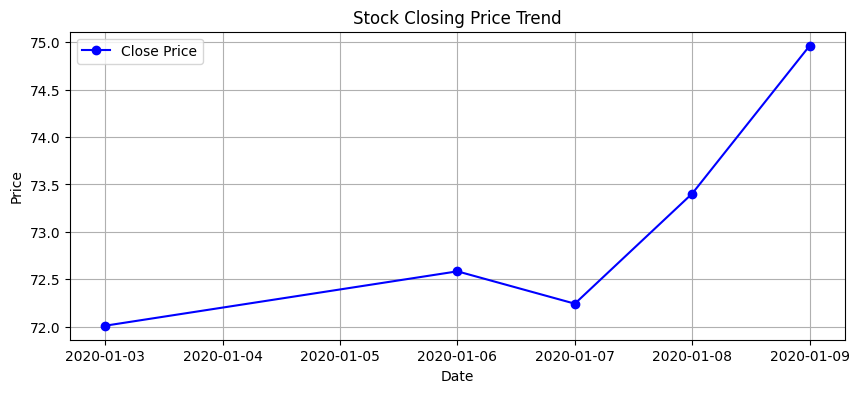

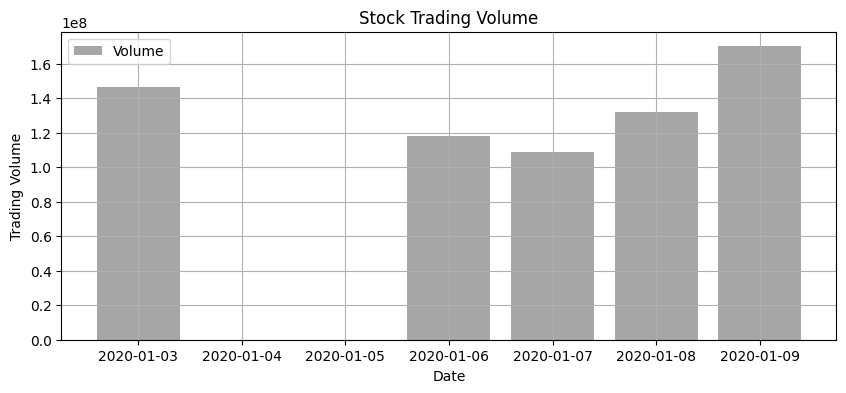

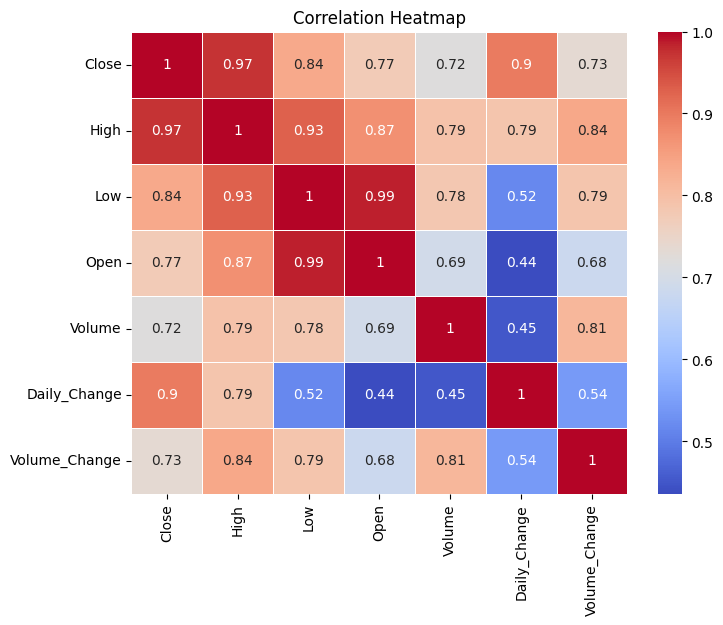

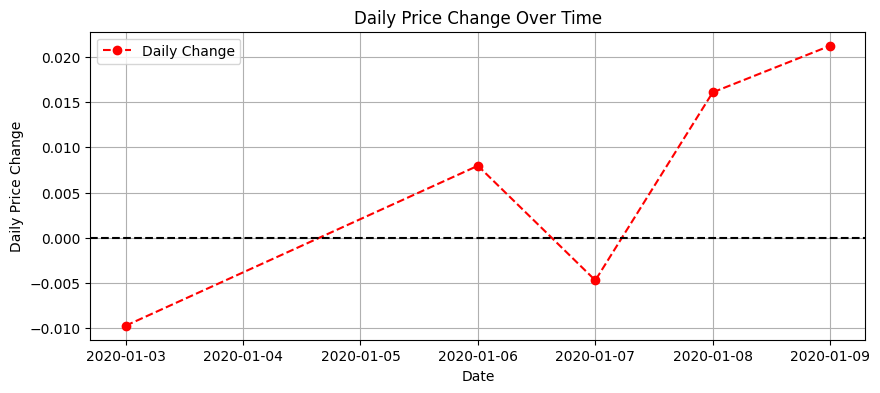

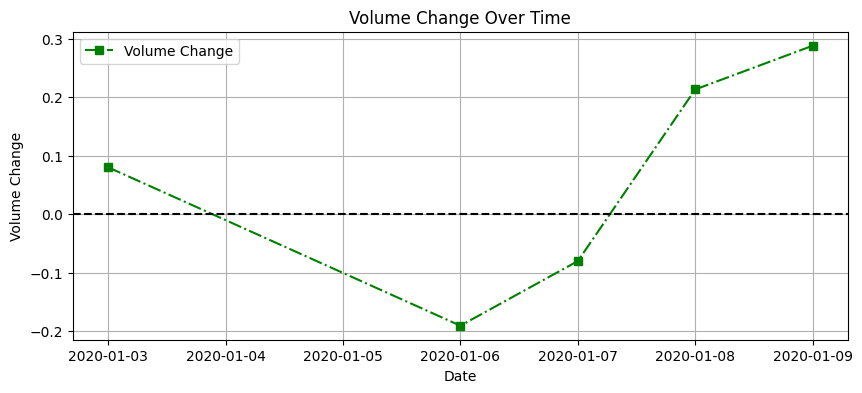

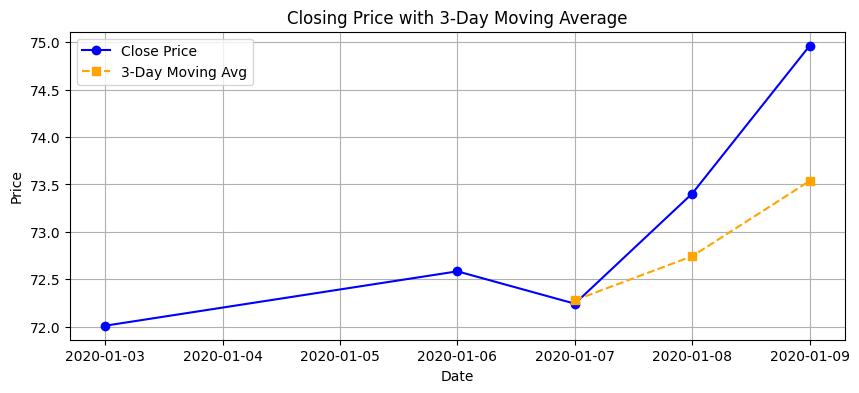

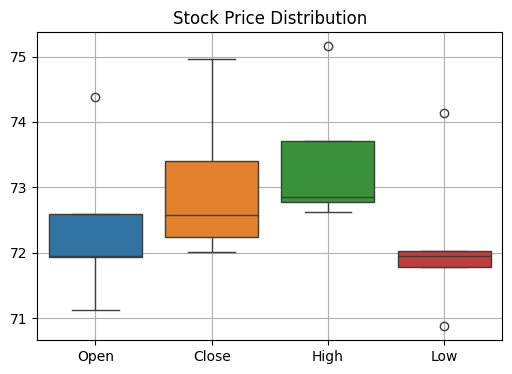

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create DataFrame manually
data = {
    "Date": ["2020-01-03", "2020-01-06", "2020-01-07", "2020-01-08", "2020-01-09"],
    "Close": [72.009132, 72.582901, 72.241554, 73.403641, 74.962799],
    "High": [72.771760, 72.621639, 72.849231, 73.706271, 75.156480],
    "Low": [71.783977, 70.876068, 72.021238, 71.943751, 74.132383],
    "Open": [71.941343, 71.127858, 72.592601, 71.943751, 74.384166],
    "Volume": [146322800, 118387200, 108872000, 132079200, 170108400],
    "Daily_Change": [-0.009722, 0.007968, -0.004703, 0.016086, 0.021241],
    "Volume_Change": [0.080029, -0.190918, -0.080374, 0.213160, 0.287927],
}

df = pd.DataFrame(data)

# Convert Date to datetime format
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Step 2: Basic Exploration
print("\n📊 First Few Rows of Data:")
print(df.head())

# Step 3: Statistical Summary
print("\n📈 Statistical Summary:")
print(df.describe())

# Step 4: Correlation Analysis
print("\n🔍 Correlation Matrix:")
print(df.corr())

# ---------------- PLOTTING ---------------- #

# 1️⃣ Closing Price Trend
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["Close"], marker="o", linestyle="-", color="b", label="Close Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Closing Price Trend")
plt.legend()
plt.grid()
plt.show()

# 2️⃣ Volume Trend
plt.figure(figsize=(10, 4))
plt.bar(df.index, df["Volume"], color="gray", alpha=0.7, label="Volume")
plt.xlabel("Date")
plt.ylabel("Trading Volume")
plt.title("Stock Trading Volume")
plt.legend()
plt.grid()
plt.show()

# 3️⃣ Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# 4️⃣ Daily Change Trend
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["Daily_Change"], marker="o", linestyle="--", color="r", label="Daily Change")
plt.axhline(0, color="black", linestyle="--")  # Zero line for reference
plt.xlabel("Date")
plt.ylabel("Daily Price Change")
plt.title("Daily Price Change Over Time")
plt.legend()
plt.grid()
plt.show()

# 5️⃣ Volume Change Trend
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["Volume_Change"], marker="s", linestyle="-.", color="g", label="Volume Change")
plt.axhline(0, color="black", linestyle="--")  # Zero line for reference
plt.xlabel("Date")
plt.ylabel("Volume Change")
plt.title("Volume Change Over Time")
plt.legend()
plt.grid()
plt.show()

# 6️⃣ Moving Average (5-Day)
df["MA_3"] = df["Close"].rolling(window=3).mean()  # 3-day moving average
plt.figure(figsize=(10, 4))
plt.plot(df.index, df["Close"], marker="o", linestyle="-", color="blue", label="Close Price")
plt.plot(df.index, df["MA_3"], marker="s", linestyle="--", color="orange", label="3-Day Moving Avg")
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Closing Price with 3-Day Moving Average")
plt.legend()
plt.grid()
plt.show()

# 7️⃣ Box Plot of Prices
plt.figure(figsize=(6, 4))
sns.boxplot(data=df[["Open", "Close", "High", "Low"]])
plt.title("Stock Price Distribution")
plt.grid()
plt.show()



📊 Model Evaluation Metrics:
Mean Absolute Error (MAE): 1.3977
Mean Squared Error (MSE): 1.9537
Root Mean Squared Error (RMSE): 1.3977


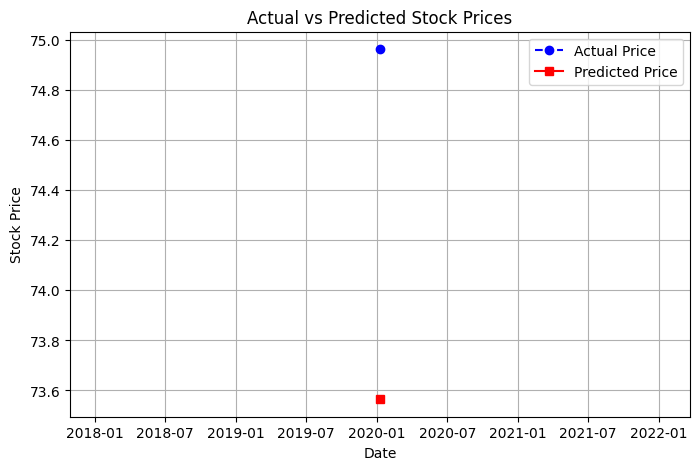

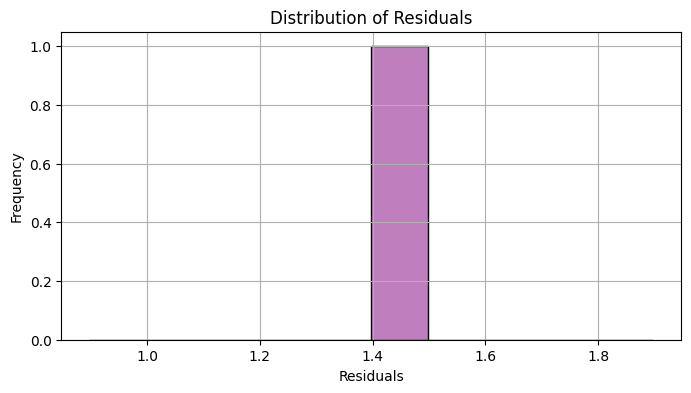

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


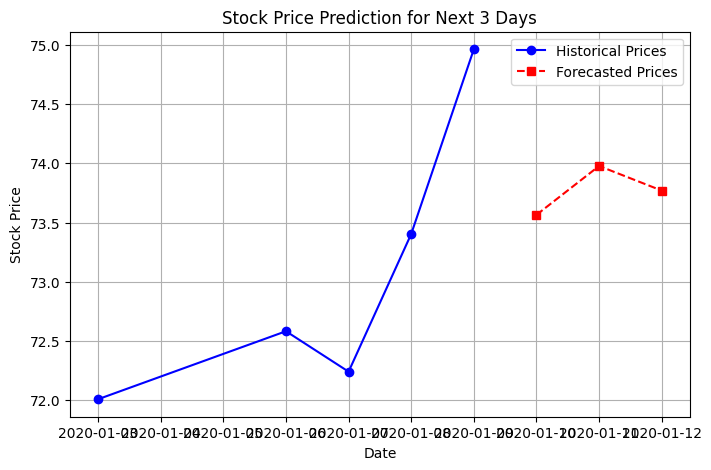

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Step 1: Create DataFrame manually
data = {
    "Date": ["2020-01-03", "2020-01-06", "2020-01-07", "2020-01-08", "2020-01-09"],
    "Close": [72.009132, 72.582901, 72.241554, 73.403641, 74.962799],
    "High": [72.771760, 72.621639, 72.849231, 73.706271, 75.156480],
    "Low": [71.783977, 70.876068, 72.021238, 71.943751, 74.132383],
    "Open": [71.941343, 71.127858, 72.592601, 71.943751, 74.384166],
    "Volume": [146322800, 118387200, 108872000, 132079200, 170108400],
    "Daily_Change": [-0.009722, 0.007968, -0.004703, 0.016086, 0.021241],
}

df = pd.DataFrame(data)

# Convert Date to datetime format
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Step 2: Define Features (X) & Target Variable (y)
X = df[["Open", "High", "Low", "Volume"]]  # Features
y = df["Close"]  # Target Variable (Closing Price)

# Step 3: Train-Test Split (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 4: Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make Predictions
y_pred = model.predict(X_test)

# Step 6: Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n📊 Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# Step 7: Plot Predictions vs Actual
plt.figure(figsize=(8, 5))
plt.plot(df.index[-len(y_test):], y_test, marker="o", linestyle="--", color="blue", label="Actual Price")
plt.plot(df.index[-len(y_test):], y_pred, marker="s", linestyle="-", color="red", label="Predicted Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Actual vs Predicted Stock Prices")
plt.legend()
plt.grid()
plt.show()

# Step 8: Plot Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=10, kde=True, color="purple")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.grid()
plt.show()

# Step 9: Forecast Next 3 Days (Simple Future Prediction)
future_dates = pd.date_range(start=df.index[-1], periods=4, freq="D")[1:]
future_X = df.iloc[-1][["Open", "High", "Low", "Volume"]].values.reshape(1, -1)

future_predictions = []
for _ in range(3):
    next_pred = model.predict(future_X)[0]
    future_predictions.append(next_pred)
    future_X[0][0] = next_pred  # Update 'Open' with predicted value

# Create Future DataFrame
future_df = pd.DataFrame({"Date": future_dates, "Predicted_Close": future_predictions})
future_df.set_index("Date", inplace=True)

# Step 10: Plot Future Forecast
plt.figure(figsize=(8, 5))
plt.plot(df.index, df["Close"], marker="o", linestyle="-", color="blue", label="Historical Prices")
plt.plot(future_df.index, future_df["Predicted_Close"], marker="s", linestyle="--", color="red", label="Forecasted Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.title("Stock Price Prediction for Next 3 Days")
plt.legend()
plt.grid()
plt.show()
